# Natural Language Processing in Python Lecture

June 2021

Pu Yan, Oxford Internet Institute, University of Oxford 

Email: <pu.yan@oii.ox.ac.uk> or <thuyanpu@gmail.com>

### Outline of the course

0. Introduction
    
1. Text cleaning and pre-processing

    1.1 Importing text data & summary of text 
    
    1.2 Removal of punctuations
    
    1.3 Tokenisation
    
    1.4 Case normalisation
    
    1.5 Stopwords removal
    
    1.6 Stemming and Lemmatisation
    
    1.7 Advanced: Part-of-Speech tagging; named entities in spaCy

2. Text analysis and visualisation

    2.1 Word counts (pre- and post-processing)
    
    2.2 Word frequency
    
    2.3 TF-IDF: table and visualisation
    
3. Beyond quantification? Toolkit for qualitative research:


The importance of text cleaning

![Garbage in, Garbage out!](img/cleaning.png)

### Useful resources

- Books:
    
    - Bengfort, B., Bilbro, R., & Ojeda, T. (2018). Applied text analysis with Python : Enabling language-aware data products with machine learning. Beijing: O'Reilly
    
    - Vanderplas, J. (2017). Python data science handbook : Essential tools for working with data. Beijing: O'Reilly
    
- Online resources:
    
    - A list of NLP courses around the world, curated by ACL (the Association for Computational Linguistics): https://aclweb.org/aclwiki/List_of_NLP/CL_courses 
    
    - An introduction to Natural Language Processing (NLP): https://port.sas.ac.uk/mod/book/view.php?id=583&chapterid=445 
    
    - Introduction to NLP & Data Science: https://www.youtube.com/watch?v=5BVebXXb2o4

## 0. Introduction

- Natural language processing (NLP) is becoming increasingly popular in social science

    - Digitalisation of content data: i.e. Google Books, Newspaper digital database (LexisNexis)
    
    - The prevalence of social media platforms: i.e. Twitter, YouTube
    
    - Large-scale data: A paradigm shift in social science research?
    
- Advanages and disadvantages of NLP compared to qualitative methods

    - Pros: Speed of analysis; Affordability (translation/transcription)
    
    - Cons: Accuracy (identifying sarcasm, jokes or irony); unstructured (compared to survey data)

### 0.1 Implications of NLP in social science and humanities

- Machine translation: "你好"<->“Hi”

- Speech recognition: "Hi, Siri"

- Sentiment analysis: understanding product reviews

- Information extraction: automatically generated abstract/keywords list

- Document classification: LDA topic modelling

### 0.2 Packages

Please ensure that you have installed the following libraries in your local enviornment: 
    
    - pandas (for loading)

    - NLTK
    
    - spacy

In [ ]:
# Installing packages required for this course 
## !! DO NOT RUN this cell if you have already installed the three packages 
## Use the following code to install three packages using pip (if you have already installed pip). 
## Or, you can choose to install the packages in Anaconda Navigator: https://docs.anaconda.com/anaconda/navigator/tutorials/pandas/ 

%pip install pandas
%pip install numpy

%pip install --user -U nltk
%pip install -U pip setuptools wheel
%pip install -U spacy
%pip install --upgrade gensim
!python -m spacy download en_core_web_sm

%pip install pillow
%pip install wordcloud

## Run the following code if you see warning message when importing gensim
#%pip install python-Levenshtein

## Run the foolowing code if you can't pip install wordcloud, you will need to have conda installed in the environment
#%conda install -c conda-forge wordcloud

We will need to import the packages before running the code

In [1]:
# Loading packages required for this course
import pandas as pd
import nltk
import gensim
## download wordnet, stopwords  if you have not downloaded nltk's wordnet and stopwords data
nltk.download('wordnet') 
nltk.download('stopwords') 
nltk.download('punkt')

#nltk.download() # You can use this line to start the NLTK Downloader and download all the data you need.

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


### 0.3 Dataset

Now, we will load the dataset (thanks to Justin Ho, who prepared the dataset!) from the "./data" folder.

The dataset includes social media posts from four parties during the 2021 Scottish Parliament election (Date range: 2021-02-06 ~ 2021-05-06):

Scottish National Party, Scottish Conservatives, Scottish Labour, Scottish Greens, Scottish Liberal Democrats


In [2]:
# Loading the dataset
df = pd.read_csv("data/scotelection2021.csv")

# There are 8 columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   snsname    2420 non-null   object
 1   snshandle  2420 non-null   object
 2   datetime   2420 non-null   object
 3   text       2400 non-null   object
 4   likes      2420 non-null   int64 
 5   comments   2420 non-null   int64 
 6   shares     2420 non-null   int64 
 7   postlink   2420 non-null   object
dtypes: int64(3), object(5)
memory usage: 151.4+ KB


In [4]:
# Let's have a glimpse of the dataset
df.head(5)

,snsname,snshandle,datetime,text,likes,comments,shares,postlink
0,Scottish National Party (SNP),theSNP,2021-05-06 23:21:41 CEST,🗳️ Polls have now closed in the 2021 Scottish ...,2399,494,92,https://www.facebook.com/77249349077/posts/101...
1,Scottish Conservatives,ScottishConservatives,2021-05-06 23:05:03 CEST,A huge thank you to everyone who headed to the...,2388,511,78,https://www.facebook.com/136308776480/posts/10...
2,Scottish Green Party,ScottishGreens,2021-05-06 23:03:41 CEST,"Thank you to all of our candidates, staff and ...",683,23,38,https://www.facebook.com/17999726169/posts/101...
3,Scottish Liberal Democrats,ScotLibDems,2021-05-06 23:02:24 CEST,"A message from Willie Rennie as polls close: ""...",44,11,0,https://www.facebook.com/397986050296687/posts...
4,Scottish Liberal Democrats,ScotLibDems,2021-05-06 23:00:28 CEST,To all our members and campaigners who’ve brav...,93,7,16,https://www.facebook.com/397986050296687/posts...


Often in crawlled dataset, we might find some rows do not contain the text data to analyse. We will make sure these rows are removed before the text analysis

In [5]:
# Checking how many rows miss "text" information
len(df[df.text.isna()])

20

In [6]:
# Removing rows where "text" column is NA from the dataframe
df = df[-df.text.isna()]

Which party gets the highest number of likes on average? Which party shares the highest number of posts on Facebook? 

Before analysing the text data, let's see the average likes each party received and total number of posts each party shared on Facebook during the data collection period.

In [7]:
# Grouping by party names and calculating the average number of likes and total number of social media posts for each party.
df.groupby(['snsname']).agg({'likes': 'mean', 
                             'text': 'count'}).reset_index()

,snsname,likes,text
0,Scottish Conservatives,779.550936,481
1,Scottish Green Party,118.150912,603
2,Scottish Labour Party,63.864119,471
3,Scottish Liberal Democrats,11.948905,411
4,Scottish National Party (SNP),1190.145161,434


It seems that **SNP** receives the highest number of likes on average, but **Scottish Green Party** is the most active party on Facebook, calculated by the total number of posts each party shared.

We therefore will focus on posts from SNP for the linguistic analysis 

In [8]:
# Creating a subset of text dataset for all SNP Facebook posts 
df_snp = df[(df["snsname"] == "Scottish National Party (SNP)")]
df_snp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 2400
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   snsname    434 non-null    object
 1   snshandle  434 non-null    object
 2   datetime   434 non-null    object
 3   text       434 non-null    object
 4   likes      434 non-null    int64 
 5   comments   434 non-null    int64 
 6   shares     434 non-null    int64 
 7   postlink   434 non-null    object
dtypes: int64(3), object(5)
memory usage: 30.5+ KB


## 1. Text cleaning and pre-processing

### 1.1 Importing text data & summary of text 

We will start with creating a summary statistics of the text data: 

- How many social media posts do we have in the dataset? 
- What is the length of each post? 
- What is the average lenghth of the Facebook posts?

In [9]:
# We dropped the following columns from the snp dataset: snshandle, comments, shares, postlink
df_snp = df_snp.drop(columns=['snshandle', 'comments', 'shares', 'postlink'])

# We calculate the number of characters we need to process, we create a new column "word_count" to calculate the number of characters in each post
# Basically, we count the spaces but add one to calculate the number of words
df_snp['word_count'] = df['text'].str.count(' ') + 1

# Here's the structure of the final dataframe
df_snp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 2400
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   snsname     434 non-null    object
 1   datetime    434 non-null    object
 2   text        434 non-null    object
 3   likes       434 non-null    int64 
 4   word_count  434 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 20.3+ KB


In [10]:
# Pandas display setting:
# We want to see longer sentences in the text column in jupyter notebook
# We reset the "max_colwidth" in the pandas display options to display all characters in the text column.
pd.set_option("display.max_colwidth", None)

# Let's see the most popular five media posts by snp (measutred by Facebook likes) 
df_snp.sort_values(by='likes', ascending=False).head(5)


,snsname,datetime,text,likes,word_count
1660,Scottish National Party (SNP),2021-03-23 17:11:37 CET,"🏴󠁧󠁢󠁳󠁣󠁴󠁿 The Scottish Parliament has voted to give its backing to First Minister Nicola Sturgeon. 🗳 Make it #BothVotesSNP on May 6 to re-elect Nicola Sturgeon as First Minister, and put Scotland's recovery in Scotland's hands.",8218,36
1630,Scottish National Party (SNP),2021-03-24 22:59:41 CET,👇 Our NHS staff deserve more than applause for their heroics over the past year. Therefore the Scottish Government is offering our NHS staff a significant wage rise.,6936,28
2011,Scottish National Party (SNP),2021-03-05 14:20:59 CET,🗳 Back Nicola Sturgeon to deliver Scotland's COVID-19 recovery. Make it #BothVotesSNP on May 6. 📮 Apply for a postal vote: www.snp.org/postal-vote:=:https://www.snp.org/postal-vote/ 🔍 Read more: www.snp.org/record:=:https://www.snp.org/record/,6874,26
2028,Scottish National Party (SNP),2021-03-04 17:58:28 CET,"👋 Welcome to the over 5,000 new members of the SNP that have joined in the last 24 hours! 🏴󠁧󠁢󠁳󠁣󠁴󠁿 Together, we’ll build the fairer, better, independent Scotland that’s within our reach. ✍️ If you haven’t yet, sign up today at https://join.snp.org/",6554,42
1698,Scottish National Party (SNP),2021-03-21 18:19:04 CET,📢 Shona Robison MSP: “I put my faith in the people of this nation to reject the mentality of the Tory lynch mob and re-elect our exceptional First Minister.” https://www.snp.org/why-i-put-my-trust-in-nicola-sturgeon/,5465,30


In [11]:
# Let's see the average number of words in the social media posts by SNP
print("There are {} social media posts from SNP in the 2021 election dataset\n".format(df_snp.word_count.count()))
print("The average number of words in SNP social media posts during 2021 election is: {}\n".format(df_snp.word_count.mean()))
print("Total number of words in SNP social media posts during 2021 election is: {}\n".format(df_snp.word_count.sum()))

There are 434 social media posts from SNP in the 2021 election dataset

The average number of words in SNP social media posts during 2021 election is: 43.05760368663594

Total number of words in SNP social media posts during 2021 election is: 18687



array([[<AxesSubplot:title={'center':'word_count'}>]], dtype=object)

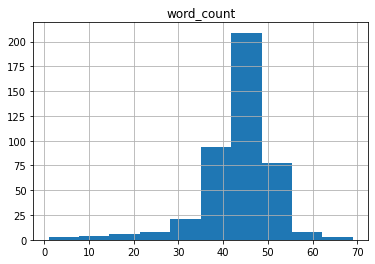

In [12]:
# Let's visualise the histogram of word counts and likes in SNP social media posts
df_snp.hist(column='word_count')

### 1.2 Removal of punctuations & 1.3 Tokenisation & 1.4 Case normalisation

In text cleaning process, we also want to remove punctuations, non-text symbols, or hyper-links in the text.

We also need to **tokenise** sentences into separated words and normalise capitalised words

By using gensim's simple_preprocess function, we can finish the three steps using one line of code! (THANK YOU GENSIM!)

Transforming sentences into tokens: 

![tokenising sentences](img/tokenising.png)

In [13]:
# Before preprocessing, we first convert the text column into a list
data = df_snp.text.values.tolist()

# Here's how the raw text data looks like
data[5]

"⏰ ONLY 1 HOUR LEFT to ensure Scotland's recovery is in Scotland's hands, not Boris Johnson's. 🔎 Find your nearest polling station and go vote now: https://wheredoivote.co.uk 📱 Don’t wake up tomorrow thinking you could have done more - message 5 of friends now and remind them to make it #BothVotesSNP."

In [14]:
# Removal of hyper-link
import re
def link_removal(sentences):
    for sentence in sentences:
        yield(re.sub(r'http\S+', '', sentence))

data_nolink = list(link_removal(data))
data_nolink[5]

"⏰ ONLY 1 HOUR LEFT to ensure Scotland's recovery is in Scotland's hands, not Boris Johnson's. 🔎 Find your nearest polling station and go vote now:  📱 Don’t wake up tomorrow thinking you could have done more - message 5 of friends now and remind them to make it #BothVotesSNP."

In [15]:
from gensim.utils import simple_preprocess

# We write a function to 1) tokenise sentences into words, and also 2) remove punctuations in the sentences 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Now, let's apply the tokenisation and removel of punctuations to all social media posts
# You will find all punctuations (including emojis, hashtag symbols) are removed from the sentence.
data_words = list(sent_to_words(data_nolink))

In [16]:
# Let see our pre-processing progress so far
example_df_1 = pd.DataFrame(
    {'raw text': data,
     'removal of punctuations, tokenised, normalised': data_words
    })
example_df_1.head(5)

,raw text,"removal of punctuations, tokenised, normalised"
0,🗳️ Polls have now closed in the 2021 Scottish Parliamentary elections. 🏴󠁧󠁢󠁳󠁣󠁴󠁿 Thank you to everyone who #VotedSNP to re-elect Nicola Sturgeon as First Minister and put Scotland’s recovery in Scotland’s hands.,"[polls, have, now, closed, in, the, scottish, parliamentary, elections, thank, you, to, everyone, who, votedsnp, to, re, elect, nicola, sturgeon, as, first, minister, and, put, scotland, recovery, in, scotland, hands]"
1,📢 There’s only 15 MINUTES LEFT to make it #BothVotesSNP to re-elect Nicola Sturgeon as First Minister and put Scotland’s recovery in Scotland’s hands. 📱 Don’t wake up the day after thinking that you could have done more - message 5 of your friends to remind them to vote.,"[there, only, minutes, left, to, make, it, bothvotessnp, to, re, elect, nicola, sturgeon, as, first, minister, and, put, scotland, recovery, in, scotland, hands, don, wake, up, the, day, after, thinking, that, you, could, have, done, more, message, of, your, friends, to, remind, them, to, vote]"
2,🚨 Don't leave our future in the hands of Boris Johnson and the Westminster Tories - VOTE NOW to secure #indyref2 and a progressive SNP government. ⏰ Only 30 minutes left to make it #BothVotesSNP. 👇 With us? Pass it on.,"[don, leave, our, future, in, the, hands, of, boris, johnson, and, the, westminster, tories, vote, now, to, secure, indyref, and, progressive, snp, government, only, minutes, left, to, make, it, bothvotessnp, with, us, pass, it, on]"
3,💛 You still have time to vote for a transformative SNP government that will deliver a National Care Service. 🗳 Don't leave it to chance - get to a polling station and make it #BothVotesSNP right now. 📲 Keep reminding all your friends and family to vote. Every vote counts!,"[you, still, have, time, to, vote, for, transformative, snp, government, that, will, deliver, national, care, service, don, leave, it, to, chance, get, to, polling, station, and, make, it, bothvotessnp, right, now, keep, reminding, all, your, friends, and, family, to, vote, every, vote, counts]"
4,"🏴󠁧󠁢󠁳󠁣󠁴󠁿 Remember, if you are in a line at a polling station before 10PM you will still be able to vote, regardless of what time you get in the building. Don’t be deterred by a queue. 🗳 Make it #BothVotesSNP TODAY to re-elect Nicola Sturgeon as First Minister","[remember, if, you, are, in, line, at, polling, station, before, pm, you, will, still, be, able, to, vote, regardless, of, what, time, you, get, in, the, building, don, be, deterred, by, queue, make, it, bothvotessnp, today, to, re, elect, nicola, sturgeon, as, first, minister]"


### 1.5 Stop words removal

- **Stop words** are high-frequency words like the, to and also that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts. (See details in this link: https://www.nltk.org/book/ch02.html)

- The NLTK library is one of the oldest and most commonly used Python libraries for Natural Language Processing. NLTK supports stop word removal, and you can find the list of stop words in the corpus module.

In [17]:
# Importing NLTK stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# You can append the list of stop_words using the code below,
# simple replace "yout_stop_words" with the word(s) you want to filter out from the corpus
stop_words.extend(['www', 'https'])

# We define a function to filter out words that appear in the stopwords list from NLTK English stopwords library
def remove_stopwords(texts):
    return [[word for word in doc if word not in stop_words] for doc in texts]

# We now apply the stopwords filtering functions on tokenised&normalised text
data_words_nostopwords = remove_stopwords(data_words)

In [18]:
# Let's see which words are included in the NLTK stopwords list
print(stop_words, end = ' ')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
# Let see our pre-processing progress so far
example_df_2 = pd.DataFrame(
    {'raw text': data,
     'removal of punctuations, tokenised, normalised': data_words,
     'stop words removed': data_words_nostopwords
    })
example_df_2.head(5)

,raw text,"removal of punctuations, tokenised, normalised",stop words removed
0,🗳️ Polls have now closed in the 2021 Scottish Parliamentary elections. 🏴󠁧󠁢󠁳󠁣󠁴󠁿 Thank you to everyone who #VotedSNP to re-elect Nicola Sturgeon as First Minister and put Scotland’s recovery in Scotland’s hands.,"[polls, have, now, closed, in, the, scottish, parliamentary, elections, thank, you, to, everyone, who, votedsnp, to, re, elect, nicola, sturgeon, as, first, minister, and, put, scotland, recovery, in, scotland, hands]","[polls, closed, scottish, parliamentary, elections, thank, everyone, votedsnp, elect, nicola, sturgeon, first, minister, put, scotland, recovery, scotland, hands]"
1,📢 There’s only 15 MINUTES LEFT to make it #BothVotesSNP to re-elect Nicola Sturgeon as First Minister and put Scotland’s recovery in Scotland’s hands. 📱 Don’t wake up the day after thinking that you could have done more - message 5 of your friends to remind them to vote.,"[there, only, minutes, left, to, make, it, bothvotessnp, to, re, elect, nicola, sturgeon, as, first, minister, and, put, scotland, recovery, in, scotland, hands, don, wake, up, the, day, after, thinking, that, you, could, have, done, more, message, of, your, friends, to, remind, them, to, vote]","[minutes, left, make, bothvotessnp, elect, nicola, sturgeon, first, minister, put, scotland, recovery, scotland, hands, wake, day, thinking, could, done, message, friends, remind, vote]"
2,🚨 Don't leave our future in the hands of Boris Johnson and the Westminster Tories - VOTE NOW to secure #indyref2 and a progressive SNP government. ⏰ Only 30 minutes left to make it #BothVotesSNP. 👇 With us? Pass it on.,"[don, leave, our, future, in, the, hands, of, boris, johnson, and, the, westminster, tories, vote, now, to, secure, indyref, and, progressive, snp, government, only, minutes, left, to, make, it, bothvotessnp, with, us, pass, it, on]","[leave, future, hands, boris, johnson, westminster, tories, vote, secure, indyref, progressive, snp, government, minutes, left, make, bothvotessnp, us, pass]"
3,💛 You still have time to vote for a transformative SNP government that will deliver a National Care Service. 🗳 Don't leave it to chance - get to a polling station and make it #BothVotesSNP right now. 📲 Keep reminding all your friends and family to vote. Every vote counts!,"[you, still, have, time, to, vote, for, transformative, snp, government, that, will, deliver, national, care, service, don, leave, it, to, chance, get, to, polling, station, and, make, it, bothvotessnp, right, now, keep, reminding, all, your, friends, and, family, to, vote, every, vote, counts]","[still, time, vote, transformative, snp, government, deliver, national, care, service, leave, chance, get, polling, station, make, bothvotessnp, right, keep, reminding, friends, family, vote, every, vote, counts]"
4,"🏴󠁧󠁢󠁳󠁣󠁴󠁿 Remember, if you are in a line at a polling station before 10PM you will still be able to vote, regardless of what time you get in the building. Don’t be deterred by a queue. 🗳 Make it #BothVotesSNP TODAY to re-elect Nicola Sturgeon as First Minister","[remember, if, you, are, in, line, at, polling, station, before, pm, you, will, still, be, able, to, vote, regardless, of, what, time, you, get, in, the, building, don, be, deterred, by, queue, make, it, bothvotessnp, today, to, re, elect, nicola, sturgeon, as, first, minister]","[remember, line, polling, station, pm, still, able, vote, regardless, time, get, building, deterred, queue, make, bothvotessnp, today, elect, nicola, sturgeon, first, minister]"


### 1.6 Stemming and Lemmatisation

The goal of both **stemming and lemmatization** is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:

    i.e am, are, is --> be 

**Stemming** usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

**Lemmatization** usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. 

    i.e. If confronted with the token saw, stemming might return just s, whereas lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun. 

In [20]:
# Python NLTK provides WordNet Lemmatizer that uses the WordNet Database to lookup lemmas of words.
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# We define a function to lookup lemmas of each word in the post
def lemmatise(texts):
    return [[wordnet_lemmatizer.lemmatize(word, pos="v") for word in doc] for doc in texts]

data_lemmatise = lemmatise(data_words_nostopwords)

[nltk_data] Downloading package wordnet to /Users/puyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


*When to use what?*

- Stemming and Lemmatization both generate the root form of the inflected words; 

- The difference is that stem might not be an actual word whereas, lemma is an actual language word;

- In lemmatization, you used WordNet corpus and a corpus for stop words as well to produce lemma which makes it slower than stemming

In [21]:
# Let see our pre-processing progress so far
example_df_3 = pd.DataFrame(
    {'raw text': data,
     'removal of punctuations, tokenised, normalised': data_words,
     'stop words removed': data_words_nostopwords,
     'lemmatised words': data_lemmatise
    })
example_df_3.head(5)

,raw text,"removal of punctuations, tokenised, normalised",stop words removed,lemmatised words
0,🗳️ Polls have now closed in the 2021 Scottish Parliamentary elections. 🏴󠁧󠁢󠁳󠁣󠁴󠁿 Thank you to everyone who #VotedSNP to re-elect Nicola Sturgeon as First Minister and put Scotland’s recovery in Scotland’s hands.,"[polls, have, now, closed, in, the, scottish, parliamentary, elections, thank, you, to, everyone, who, votedsnp, to, re, elect, nicola, sturgeon, as, first, minister, and, put, scotland, recovery, in, scotland, hands]","[polls, closed, scottish, parliamentary, elections, thank, everyone, votedsnp, elect, nicola, sturgeon, first, minister, put, scotland, recovery, scotland, hands]","[poll, close, scottish, parliamentary, elections, thank, everyone, votedsnp, elect, nicola, sturgeon, first, minister, put, scotland, recovery, scotland, hand]"
1,📢 There’s only 15 MINUTES LEFT to make it #BothVotesSNP to re-elect Nicola Sturgeon as First Minister and put Scotland’s recovery in Scotland’s hands. 📱 Don’t wake up the day after thinking that you could have done more - message 5 of your friends to remind them to vote.,"[there, only, minutes, left, to, make, it, bothvotessnp, to, re, elect, nicola, sturgeon, as, first, minister, and, put, scotland, recovery, in, scotland, hands, don, wake, up, the, day, after, thinking, that, you, could, have, done, more, message, of, your, friends, to, remind, them, to, vote]","[minutes, left, make, bothvotessnp, elect, nicola, sturgeon, first, minister, put, scotland, recovery, scotland, hands, wake, day, thinking, could, done, message, friends, remind, vote]","[minutes, leave, make, bothvotessnp, elect, nicola, sturgeon, first, minister, put, scotland, recovery, scotland, hand, wake, day, think, could, do, message, friends, remind, vote]"
2,🚨 Don't leave our future in the hands of Boris Johnson and the Westminster Tories - VOTE NOW to secure #indyref2 and a progressive SNP government. ⏰ Only 30 minutes left to make it #BothVotesSNP. 👇 With us? Pass it on.,"[don, leave, our, future, in, the, hands, of, boris, johnson, and, the, westminster, tories, vote, now, to, secure, indyref, and, progressive, snp, government, only, minutes, left, to, make, it, bothvotessnp, with, us, pass, it, on]","[leave, future, hands, boris, johnson, westminster, tories, vote, secure, indyref, progressive, snp, government, minutes, left, make, bothvotessnp, us, pass]","[leave, future, hand, boris, johnson, westminster, tories, vote, secure, indyref, progressive, snp, government, minutes, leave, make, bothvotessnp, us, pass]"
3,💛 You still have time to vote for a transformative SNP government that will deliver a National Care Service. 🗳 Don't leave it to chance - get to a polling station and make it #BothVotesSNP right now. 📲 Keep reminding all your friends and family to vote. Every vote counts!,"[you, still, have, time, to, vote, for, transformative, snp, government, that, will, deliver, national, care, service, don, leave, it, to, chance, get, to, polling, station, and, make, it, bothvotessnp, right, now, keep, reminding, all, your, friends, and, family, to, vote, every, vote, counts]","[still, time, vote, transformative, snp, government, deliver, national, care, service, leave, chance, get, polling, station, make, bothvotessnp, right, keep, reminding, friends, family, vote, every, vote, counts]","[still, time, vote, transformative, snp, government, deliver, national, care, service, leave, chance, get, poll, station, make, bothvotessnp, right, keep, remind, friends, family, vote, every, vote, count]"
4,"🏴󠁧󠁢󠁳󠁣󠁴󠁿 Remember, if you are in a line at a polling station before 10PM you will still be able to vote, regardless of what time you get in the building. Don’t be deterred by a queue. 🗳 Make it #BothVotesSNP TODAY to re-elect Nicola Sturgeon as First Minister","[remember, if, you, are, in, line, at, polling, station, before, pm, you, will, still, be, able, to, vote, regardless, of, what, time, you, get, in, the, building, don

### 1.7 Advanced: Part-of-Speech tagging; named entities in spaCy
#### PoS tagging
In NLP pre-processing, we often need to focus on "meaningful" words such as nouns, verbs, and adjectives. 

spaCy use *trained pipilines* and *statistical models* to predict Part-of-Speech tags in the document. 

This is a system that make *predictions* on the Part of Speech of each word in the sentence, for example, a word following “the” in English is most likely a noun.

In [25]:
# Part-of-speech tag 
import spacy
from spacy import displacy

# fine-grained and coarse-grained part-of-speech tags in non-English languages: https://spacy.io/models
## POS tag scheme for English
nlp = spacy.load("en_core_web_sm") 

# Let's visualise the Part-of-Speech tags
pos_example = nlp(u'Can digital computers think? by Alan Turing, a computer scientist born in London')
displacy.render(pos_example, style = 'dep', jupyter = True, options = {'distance': 100})

#### Named entities
- A named entity is a “real-world object” that’s assigned a name – for example, a person (Alan Turing), a city (London), a product or a book title. 
- We can use spaCy to recognize various types of named entities in a document
- Because models are statistical and strongly depend on the examples they were trained on, this doesn’t always work perfectly and might need some fine-tuning later

In [147]:
# Named entities recognition
displacy.render(pos_example, style="ent", jupyter = True)

In [148]:
# How to include meaningful words ONLY in the corpus by using the POS tagging?
import spacy

# We need to use spacy for pos-tagging
nlp = spacy.load("en_core_web_sm")

# Create a pos-tagging processor, allowing only nounds, adjectives, verbs, and adverbs in the corpus
def postags_filter(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Now, keeping only noun, adj, vb, adv
data_postag = postags_filter(data_lemmatise, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [149]:
# Let see our pre-processing progress so far
example_df_4 = pd.DataFrame(
    {'raw text': data,
     'removal of punctuations, tokenised, normalised': data_words,
     'stop words removed': data_words_nostopwords,
     'lemmatised words': data_lemmatise,
     'pos tagged': data_postag
    })
example_df_4.head(5)

,raw text,"removal of punctuations, tokenised, normalised",stop words removed,lemmatised words,pos tagged
0,🗳️ Polls have now closed in the 2021 Scottish Parliamentary elections. 🏴󠁧󠁢󠁳󠁣󠁴󠁿 Thank you to everyone who #VotedSNP to re-elect Nicola Sturgeon as First Minister and put Scotland’s recovery in Scotland’s hands.,"[polls, have, now, closed, in, the, scottish, parliamentary, elections, thank, you, to, everyone, who, votedsnp, to, re, elect, nicola, sturgeon, as, first, minister, and, put, scotland, recovery, in, scotland, hands]","[polls, closed, scottish, parliamentary, elections, thank, everyone, votedsnp, elect, nicola, sturgeon, first, minister, put, scotland, recovery, scotland, hands]","[poll, close, scottish, parliamentary, elections, thank, everyone, votedsnp, elect, nicola, sturgeon, first, minister, put, scotland, recovery, scotland, hand]","[poll, close, scottish, parliamentary, election, thank, votedsnp, elect, sturgeon, first, minister, put, scotland, recovery, scotland, hand]"
1,📢 There’s only 15 MINUTES LEFT to make it #BothVotesSNP to re-elect Nicola Sturgeon as First Minister and put Scotland’s recovery in Scotland’s hands. 📱 Don’t wake up the day after thinking that you could have done more - message 5 of your friends to remind them to vote.,"[there, only, minutes, left, to, make, it, bothvotessnp, to, re, elect, nicola, sturgeon, as, first, minister, and, put, scotland, recovery, in, scotland, hands, don, wake, up, the, day, after, thinking, that, you, could, have, done, more, message, of, your, friends, to, remind, them, to, vote]","[minutes, left, make, bothvotessnp, elect, nicola, sturgeon, first, minister, put, scotland, recovery, scotland, hands, wake, day, thinking, could, done, message, friends, remind, vote]","[minutes, leave, make, bothvotessnp, elect, nicola, sturgeon, first, minister, put, scotland, recovery, scotland, hand, wake, day, think, could, do, message, friends, remind, vote]","[minute, leave, make, bothvotessnp, elect, sturgeon, first, minister, put, scotland, recovery, scotland, hand, wake, day, think, do, message, friend, remind, vote]"
2,🚨 Don't leave our future in the hands of Boris Johnson and the Westminster Tories - VOTE NOW to secure #indyref2 and a progressive SNP government. ⏰ Only 30 minutes left to make it #BothVotesSNP. 👇 With us? Pass it on.,"[don, leave, our, future, in, the, hands, of, boris, johnson, and, the, westminster, tories, vote, now, to, secure, indyref, and, progressive, snp, government, only, minutes, left, to, make, it, bothvotessnp, with, us, pass, it, on]","[leave, future, hands, boris, johnson, westminster, tories, vote, secure, indyref, progressive, snp, government, minutes, left, make, bothvotessnp, us, pass]","[leave, future, hand, boris, johnson, westminster, tories, vote, secure, indyref, progressive, snp, government, minutes, leave, make, bothvotessnp, us, pass]","[leave, future, hand, boris, johnson, tory, vote, secure, indyref, progressive, snp, government, minute, leave, make, bothvotessnp, pass]"
3,💛 You still have time to vote for a transformative SNP government that will deliver a National Care Service. 🗳 Don't leave it to chance - get to a polling station and make it #BothVotesSNP right now. 📲 Keep reminding all your friends and family to vote. Every vote counts!,"[you, still, have, time, to, vote, for, transformative, snp, government, that, will, deliver, national, care, service, don, leave, it, to, chance, get, to, polling, station, and, make, it, bothvotessnp, right, now, keep, reminding, all, your, friends, and, family, to, vote, every, vote, counts]","[still, time, vote, transformative, snp, government, deliver, national, care, service, leave, chance, get, polling, station, make, bothvotessnp, right, keep, reminding, friends, family, vote, every, vote, counts]","[still, time, vote, transformative, snp, government, deliver, national, care, service, leave, chance, get, poll, station, make, bothvotessnp, right, keep, remind, friends, family

## 2. Text analysis and visualisation

### 2.1 Word counts (pre- and post-processing)

Let's now merge the processed text into the dataframe and generate a column for word counts after processing(text cleaning). We can see how much textual information has been filtered out from the raw data

In [150]:
# Create Corpus for TD-IDF analysis 
df_snp["text_cleaned"] = data_postag # Use the data_lemmatized for text analysis
df_snp["word_count_cleaned"] = df_snp['text_cleaned'].str.len()
df_snp.head(5)

,snsname,datetime,text,likes,word_count,text_cleaned,word_count_cleaned
0,Scottish National Party (SNP),2021-05-06 23:21:41 CEST,🗳️ Polls have now closed in the 2021 Scottish Parliamentary elections. 🏴󠁧󠁢󠁳󠁣󠁴󠁿 Thank you to everyone who #VotedSNP to re-elect Nicola Sturgeon as First Minister and put Scotland’s recovery in Scotland’s hands.,2399,32,"[poll, close, scottish, parliamentary, election, thank, votedsnp, elect, sturgeon, first, minister, put, scotland, recovery, scotland, hand]",16
7,Scottish National Party (SNP),2021-05-06 22:45:00 CEST,📢 There’s only 15 MINUTES LEFT to make it #BothVotesSNP to re-elect Nicola Sturgeon as First Minister and put Scotland’s recovery in Scotland’s hands. 📱 Don’t wake up the day after thinking that you could have done more - message 5 of your friends to remind them to vote.,220,49,"[minute, leave, make, bothvotessnp, elect, sturgeon, first, minister, put, scotland, recovery, scotland, hand, wake, day, think, do, message, friend, remind, vote]",21
9,Scottish National Party (SNP),2021-05-06 22:30:00 CEST,🚨 Don't leave our future in the hands of Boris Johnson and the Westminster Tories - VOTE NOW to secure #indyref2 and a progressive SNP government. ⏰ Only 30 minutes left to make it #BothVotesSNP. 👇 With us? Pass it on.,657,41,"[leave, future, hand, boris, johnson, tory, vote, secure, indyref, progressive, snp, government, minute, leave, make, bothvotessnp, pass]",17
10,Scottish National Party (SNP),2021-05-06 22:15:01 CEST,💛 You still have time to vote for a transformative SNP government that will deliver a National Care Service. 🗳 Don't leave it to chance - get to a polling station and make it #BothVotesSNP right now. 📲 Keep reminding all your friends and family to vote. Every vote counts!,155,50,"[still, time, vote, transformative, snp, government, deliver, national, care, service, leave, chance, get, poll, station, make, bothvotessnp, right, keep, remind, friend, family, vote, vote, count]",25
11,Scottish National Party (SNP),2021-05-06 22:13:15 CEST,"🏴󠁧󠁢󠁳󠁣󠁴󠁿 Remember, if you are in a line at a polling station before 10PM you will still be able to vote, regardless of what time you get in the building. Don’t be deterred by a queue. 🗳 Make it #BothVotesSNP TODAY to re-elect Nicola Sturgeon as First Minister",170,48,"[remember, line, poll, station, pm, still, able, vote, regardless, time, build, deter, queue, make, bothvotessnp, today, elect, sturgeon, first, minister]",20


### 2.2 Word frequency

- An important question when analysing text data is: How to measure the key information in the corpus? 

- The most strait-forward way is to calculate **Term Frequency (TF)**, which is how frequency each word appear in the dataset

In [184]:
# We used NLTK's FreqDist to find the most common words in the corpora
from nltk.probability import FreqDist

# We merged all pre-processed social media content from SNP into one corpora
corpora = df_snp['text_cleaned'].sum()

# And displayed the top 20 most common terms in the corpora
fdist = FreqDist(corpora)
top_20 = fdist.most_common(20)
top_20

[('scotland', 489),
 ('bothvotessnp', 297),
 ('make', 277),
 ('snp', 207),
 ('vote', 170),
 ('elect', 158),
 ('hand', 146),
 ('recovery', 128),
 ('sturgeon', 119),
 ('put', 103),
 ('first', 99),
 ('child', 96),
 ('future', 90),
 ('minister', 88),
 ('free', 79),
 ('scottish', 77),
 ('government', 67),
 ('deliver', 64),
 ('nhs', 58),
 ('get', 52)]

### 2.3 TF-IDF: table and visualisation

- **TF-IDF** With tf-idf, instead of representing a term in a document by its raw frequency (number of occurrences) or its relative frequency (term count divided by document length), each term is weighted by dividing the term frequency by the number of documents in the corpus containing the word

- The overall effect of this weighting scheme is to avoid a common problem when conducting text analysis: the most frequently used words in a document are often the most frequently used words in all of the documents: i.e. the, a, not

- Terms with the highest tf-idf scores are the terms in a document that are distinctively frequent in a document, when that document is compared other documents.

More details on TF-IDF can be found here: https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf


In [213]:
# Text processing steps like tokenization and removing punctuation will happen automatically when we use Scikit-Learn’s TfidfVectorizer 
# We therefore create a list of strings of the cleaned social media posts
corpora_strings = [" ".join(text) for text in df_snp['text_cleaned'].values]

#import the TfidfVectorizer from Scikit-Learn.
from sklearn.feature_extraction.text import TfidfVectorizer

# Our corpora already removes common english stopwords, so we set stop_words = none
vectorizer = TfidfVectorizer(stop_words=None, use_idf=True, norm=None) 

#The fit_transform() method converts the list of strings to something called a sparse matrix. 
#In this case, the matrix represents tf-idf values for all texts. 
transformed_documents = vectorizer.fit_transform(corpora_strings).todense()

# We want to creat a matrix of word-document, where each document has the same number of values, one for each word in the corpus
matrix_df = pd.DataFrame(transformed_documents, columns=vectorizer.get_feature_names())

# Let's now get the tf-idf values for all words
words_tfidf = matrix_df.sum(axis=0).sort_values(ascending=False)

In [214]:
words_tfidf[:20]

scotland        694.064214
make            418.498698
snp             417.953747
bothvotessnp    416.400761
vote            400.664017
elect           348.834230
hand            311.520727
recovery        292.845349
child           292.799457
sturgeon        280.464812
put             251.383555
first           246.547477
future          242.398746
free            238.177339
minister        228.624811
scottish        221.040313
government      195.403017
deliver         194.066865
nhs             189.583645
school          177.412788
dtype: float64

### 2.4 Visualisation of keywords using tf-idf

In the preliminary analysis of text data, we often want to show the results through visualisation. We can show the top ranked keywords using tf-idf scores and generate word clouds of keywords

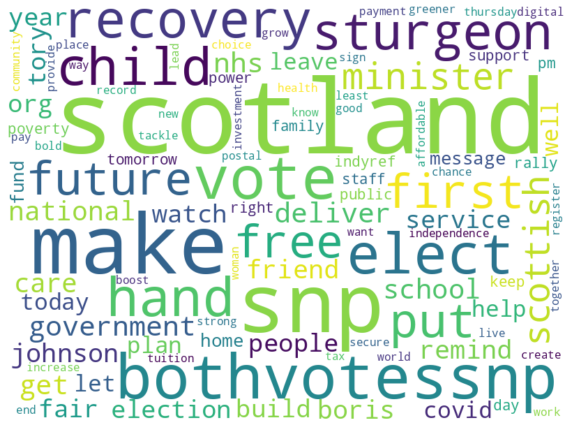

In [217]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
## Creating a wordcloud using top ranked 100 words (measured by TD-IDF) for the SNP corpora
fig, ax = plt.subplots(figsize=(10,10))
wc = WordCloud(background_color = 'white',
              width=800,height=600,
              max_words=2000).fit_words(words_tfidf[:100])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Want a more taylored visualisation for SNP? Sure!

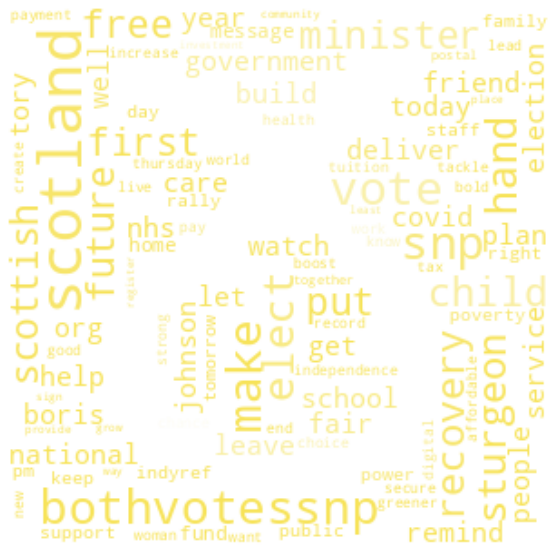

In [218]:
import numpy as np
from PIL import Image
## Creating a masked wordcloud using SNP's logo
fig, ax = plt.subplots(figsize=(10,10))
custom_mask = np.array(Image.open("img/snp.png"))
wc_2 = WordCloud(background_color = 'white',
              width=800,height=600,
              mask = custom_mask,
              mode='RGBA',
              max_words=2000).fit_words(words_tfidf[:100])
image_colors = ImageColorGenerator(custom_mask)
wc_2.recolor(color_func = image_colors)
plt.imshow(wc_2, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3. Beyond quantification? Toolkit for qualitative research:

- There are many ways to examine the **context** of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. 

- Here we look up the word *covid* in the text

In [256]:
from nltk.text import Text
corpora = df_snp['text_cleaned'].sum()
df_snp['text'].values.tolist()
textList = Text(corpora)
textList.concordance('covid')

Displaying 25 of 37 matches:
 today secure choice scotland future covid crisis pass wake day think do messag
hvotessnp remind friend vote rebuild covid support scotland young people extend
 public health issue face today even covid make priority elect increase scottis
 make bothvotessnp strong leadership covid plan recovery welfare cut bold actio
 make bothvotessnp strong leadership covid fair recovery scotland net increase 
minister sturgeon set plan first day covid recovery elect want strong leadershi
an blackford challenge boris johnson covid remark tory sleaze scandal pmqs nhs 
ine make bothvotessnp text tax break covid contract crony boris johnson governm
 make bothvotessnp strong leadership covid plan recovery tory text contract sca
sh private text communication regard covid contract pmqs see snp government vot
nd choice together make lot progress covid sturgeon confirm shop service beauty
en monday april check full timetable covid restriction ease thank success suppr
triction ea

Finally, let's do something creative, by generating a social media post that is in similar style as what we have seen in the SNP corpora

In [257]:
textList.generate()

provide certainty passenger rail staff bring scotrail public hand
deliver well value well service average save household compare
privatise service south border let keep thursday make bothvotessnp
elect sturgeon first minister put scotland recovery scotland hand
together create greener fair future independence make bothvotessnp
education basic right privilege abolish tuition fee expand education
maintenance allowance scrap england snp never tuition fee scotland
make bothvotessnp today put scotland future hand boris johnson tory
wake day think do message friend family member callous charge tory try
impose scotland let keep bring scotrail public hand scottish
government control provide certainty passenger staff place


Building ngram index...


'provide certainty passenger rail staff bring scotrail public hand\ndeliver well value well service average save household compare\nprivatise service south border let keep thursday make bothvotessnp\nelect sturgeon first minister put scotland recovery scotland hand\ntogether create greener fair future independence make bothvotessnp\neducation basic right privilege abolish tuition fee expand education\nmaintenance allowance scrap england snp never tuition fee scotland\nmake bothvotessnp today put scotland future hand boris johnson tory\nwake day think do message friend family member callous charge tory try\nimpose scotland let keep bring scotrail public hand scottish\ngovernment control provide certainty passenger staff place'

![ending](img/end.png)